In [1]:
from math import *

In [5]:
filename = 'log_train.txt'
# filename = './10_05_ver2/train_log.txt'
with open(filename,'r') as f : 
    lines= f.readlines()
print(len(lines))

lines_remove = 0
text_to_remove = ["Saving to checkpoint","Loading from checkpoint","Done","EVAL"]
batch_found = False
contain_avg = True
contain_homo = False

for i in lines[:]:
    if any([element in i for element in text_to_remove]):
        lines.remove(i)
        lines_remove+=1
        continue
    if not batch_found:
        if "BATCH" in i:
            step = int(i.split("/")[0][-4:])
            total_batch = int(i.split("/")[1][:4])
            # print(step,total_batch)
            lines_of_batch = int(total_batch/step)
            batch_size = 3712 / total_batch
            # epoch, lr, weight
            lines_of_batch = lines_of_batch + 3
            if contain_homo:
                lines_of_batch+=1
            if contain_avg:
                lines_of_batch+=1
            batch_found = True
    # print(i)



print("Line removed: {}".format(str(lines_remove)))
print("Batch size: {}".format(str(int(batch_size))))
print("Batch contains {} lines.".format(lines_of_batch))
print("=====================")

3808
Line removed: 28
Batch size: 32
Batch contains 27 lines.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
lenLines = len(lines)
results = []
result_weight_epochs=[]
average_results = []
for i in range(0,lenLines,lines_of_batch):
    tmp= lines[i:i+lines_of_batch]
    # print(i)
    result_epoch=[]
    for j in range(2,len(tmp)):
        if j == 2 :  # weight
            weight_temp=tmp[j].split(':')[4:]
            # print(temp)
            try:
                weight_temp=[float(i.split(',')[0]) for i in weight_temp]
            except ValueError as e:
                print("weight error",e,"on line",i)
            result_weight_epochs.append(weight_temp)
            continue
        elif j == len(tmp) -1: # average
            continue
        elif contain_homo and j == 3:
            continue
        temp=tmp[j].split(':')[3:]
        try:
            temp=[float(i.split(',')[0]) for i in temp]
        except ValueError as e:
            print("loss error",e,"on line",i)

            print(lines[i])
            print(temp)
            print()
        
        result_epoch.append(temp)
        
    if len(result_epoch) == 0:
        continue
    try:
        results.append(np.stack(np.array(result_epoch)))
    except:
        print()
        
        
# print(results)
result_weight_epochs = np.array(result_weight_epochs)
average_results = np.array(average_results)
results = np.array(results)

    

In [9]:
print(results.shape)
results_mean=np.mean(results,axis=1)

(140, 23, 7)


In [13]:
results_mean.shape

(140, 7)

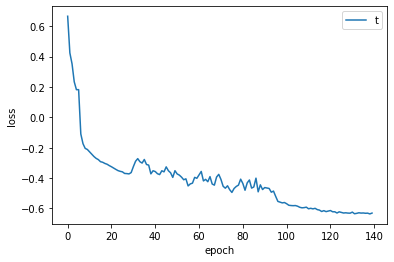

In [15]:
title=['stage1 :offset2d', 'stage1 :seg', 'stage1 :size2d','stage2 :size3d']
# for i in [2,4,5,6]:
plt.plot(results_mean[:,-1])
plt.legend(title[0])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('test')

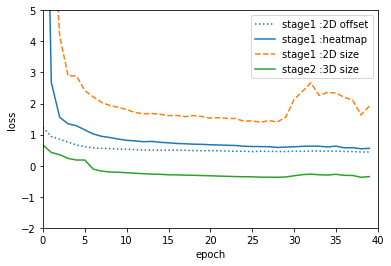

In [11]:
end_epoch = 40
title=['stage1 :2D offset', 'stage1 :heatmap', 'stage1 :2D size','stage2 :3D size']
# for i in [2,4,5,6]:

plt.plot(results_mean[:end_epoch,2],linestyle='dotted')
plt.plot(results_mean[:end_epoch,4],color='#1f77b4')
plt.plot(results_mean[:end_epoch,5],linestyle='dashed')
plt.plot(results_mean[:end_epoch,6])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim(0,end_epoch)
plt.ylim(-2, 5)
    
plt.legend(title)
#plt.show()

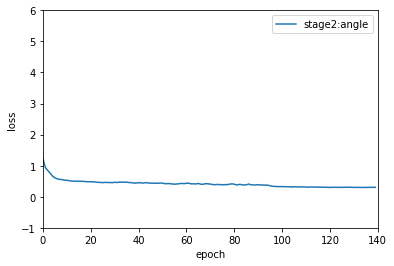

In [13]:
title=['stage2:angle', 'stage2:3D offset', 'stage3: depth']
# depth_loss:, heading_loss:, offset2d_loss:, offset3d_loss:, seg_loss:, size2d_loss:, size3d_loss:
end_epoch = 140
plt.plot(results_mean[:end_epoch,2])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(-1, 6)
plt.xlim(0,end_epoch)
plt.legend(title)


(0.0, 40.0)

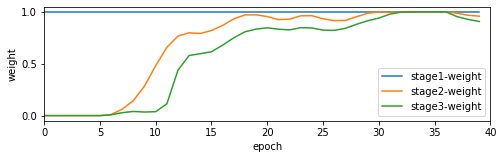

In [14]:
end_epoch = 40
stage1 = (result_weight_epochs[:end_epoch,2] + result_weight_epochs[:end_epoch,4] + result_weight_epochs[:end_epoch,5])/3
stage2 = (result_weight_epochs[:end_epoch,3] + result_weight_epochs[:end_epoch,6] + result_weight_epochs[:end_epoch,1])/3
stage3 = result_weight_epochs[:end_epoch,0]
stage =['stage1-weight','stage2-weight','stage3-weight']
stage_value=[stage1,stage2,stage3]
plt.figure(figsize=(8,2.1))
for i in stage_value:
    plt.plot(i)
plt.xlabel('epoch')
plt.ylabel('weight')
plt.yticks(np.arange(0, 1.01, 0.5))
plt.legend(stage)

# plt.ylim(0,1)
plt.xlim(0,end_epoch)